# First semester Project 

## PLEASE OPEN THIS NOTEBOOK IN PYTHON 3

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

**The goal of this notebook is to make the prediction by implementing the actions described in the cells. Each cell has a level, please complete the level 1, then 2, then 3 and then ++.**
**Do not hesitate to add comments, to proper print your code and to explain the outputs.**

## Load and examine


In [1]:
# Level 1 
# Import the usual libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Level 1 
# Read and parse the loan_data.cs file.

file_path = 'loan_data.csv'

df = pd.read_csv(file_path)

df

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

In [3]:
# Level 1 
# Prints information about a dataset (hint 1).

column_names = df.columns
print("List of all columns", column_names)

List of all columns Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


In [4]:
# Level 1 
# Prints the first rows of the dataset (hint 2).

df.head(1)

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189        829.1       11.350407   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0

In [5]:
# Level 1 
# Generate descriptive statistics of the dataset (hint 3).

statistics = df.describe()

print("Statistics : ")
print(statistics)

Statistics : 
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
mi

In [6]:
# Level 1 
# How many rows and columns does the dataset have ?

num_columns = df.shape[1]
num_rows = len(df)

print(f"The DataFrame contains {num_rows} rows and {num_columns} columns.")

The DataFrame contains 9578 rows and 14 columns.


In [7]:
# Level 1 
# List all purposes of this dataset.

print("Kind of purpose :", df["purpose"].unique())

Kind of purpose : ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


## Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Focus on getting the main idea of the plot and do not hesitate to comment it.

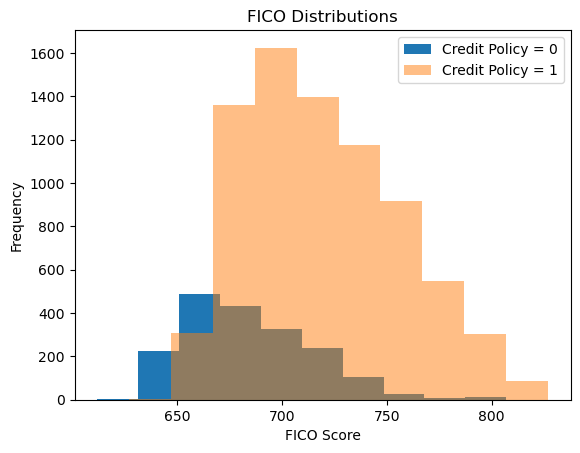

Cet histogramme montre que la répartition des clients qui répondent aux critères de souscription de crédit de LendingClub.com ont un meilleur score de FICO et qu'ils sont plus nombreux


In [8]:
# Level 1 
# Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome. 
# (hint 4 and 4 bis)

credit_policy_0 = df[df['credit.policy'] == 0]['fico']
credit_policy_1 = df[df['credit.policy'] == 1]['fico']

# credit.policy=0
plt.hist(credit_policy_0, label='Credit Policy = 0')

# credit.policy=1
plt.hist(credit_policy_1, alpha=0.5, label='Credit Policy = 1')

plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.title('FICO Distributions')
plt.legend()

plt.show()

print("Cet histogramme montre que la répartition des clients qui répondent aux critères de souscription de crédit de LendingClub.com ont un meilleur score de FICO et qu'ils sont plus nombreux")

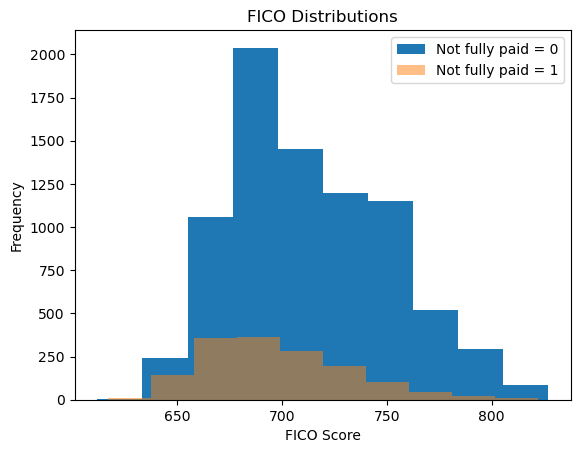

Cet histogramme montre que la répartition des clients qui n'ont pas complétement payé sont moins nombreux


In [9]:
# Level 1 
# Create a similar figure, except this time select by the not.fully.paid column.
#(hint 5)

credit_policy_0 = df[df['not.fully.paid'] == 0]['fico']
credit_policy_1 = df[df['not.fully.paid'] == 1]['fico']

# not.fully.paid=0
plt.hist(credit_policy_0, label='Not fully paid = 0')

# not.fully.paid=1
plt.hist(credit_policy_1, alpha=0.5, label='Not fully paid = 1')

plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.title('FICO Distributions')
plt.legend()

plt.show()

print("Cet histogramme montre que la répartition des clients qui n'ont pas complétement payé sont moins nombreux")

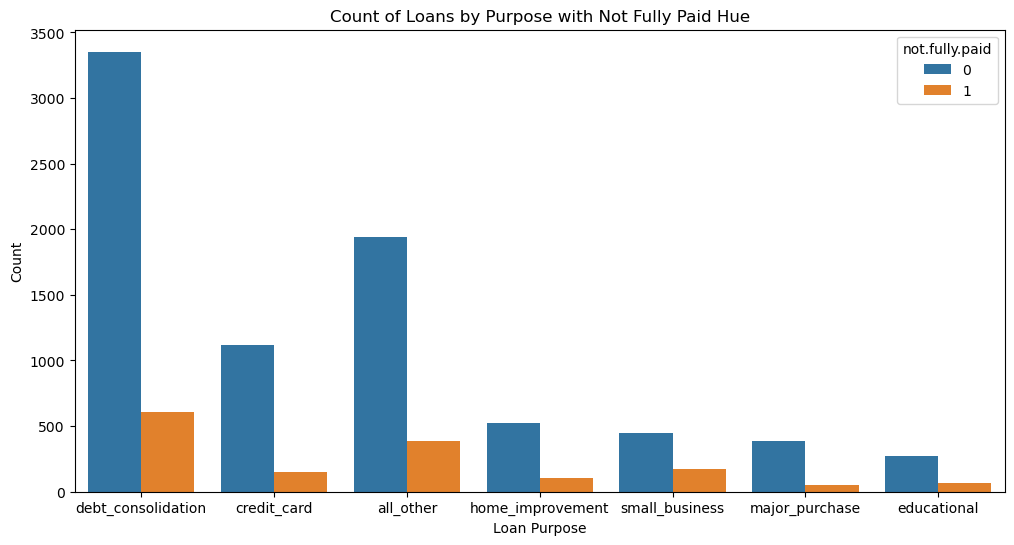

Il y a plus de personne ayant une consolidation de la dette
Les données entre une personne qui n'a pas encore tout payé est la même qu'une personne qui a tout payé


In [10]:
# Level 2
# Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.
# (hint 6)


plt.figure(figsize=(12, 6)) 
sns.countplot(x='purpose', hue='not.fully.paid', data=df)

plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Count of Loans by Purpose with Not Fully Paid Hue')

plt.show()

print("Il y a plus de personne ayant une consolidation de la dette")
print("Les données entre une personne qui n'a pas encore tout payé est la même qu'une personne qui a tout payé")

Trend between FICO score and interest rate


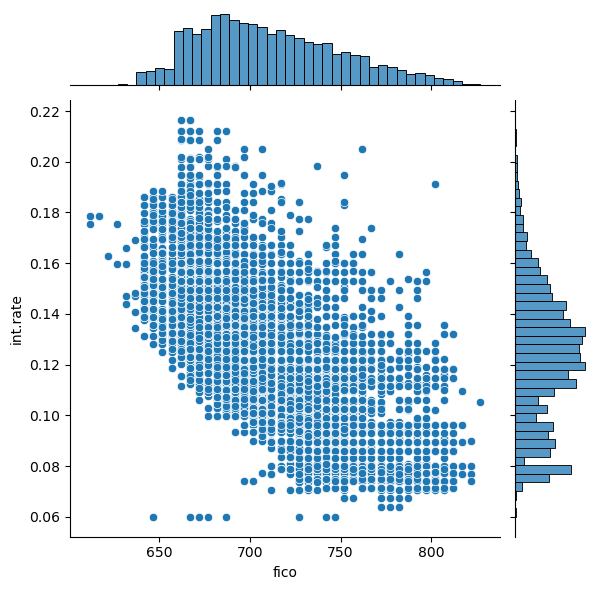

In [11]:
# Level 3
# Let's see the trend between FICO score and interest rate. Use the jointplot function.
# (hint 7)

sns.jointplot(x='fico', y='int.rate', data=df, kind='scatter')

plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
print("Trend between FICO score and interest rate")

plt.show()


Trend differed between not.fully.paid and credit.policy


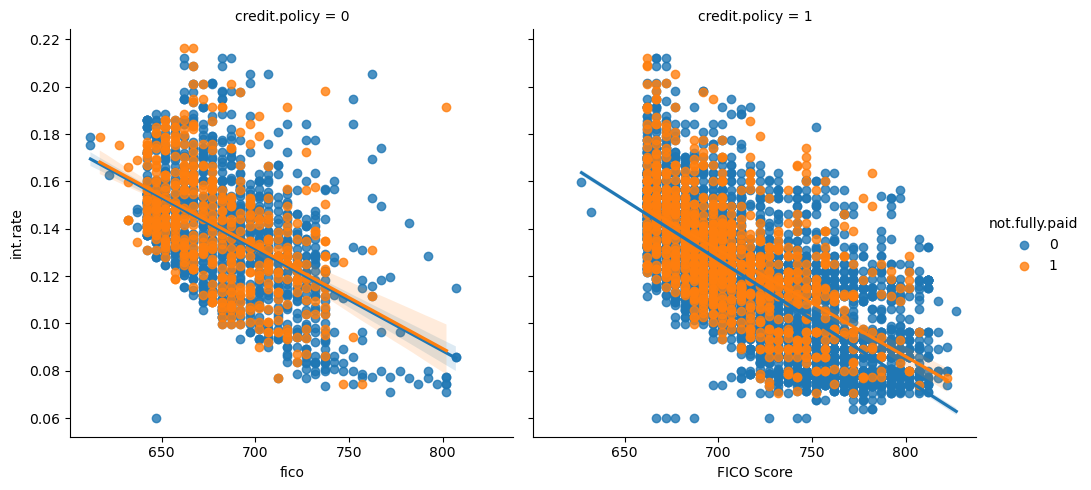

In [12]:
# Level 3
# Create lmplots to see if the trend differed between not.fully.paid and credit.policy.
# Check the documentation for lmplot() if you can't figure out how to separate it into columns.
# (hint 8)

sns.lmplot(x='fico', y='int.rate', data=df, hue='not.fully.paid', col='credit.policy')

plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
print("Trend differed between not.fully.paid and credit.policy")

plt.show()


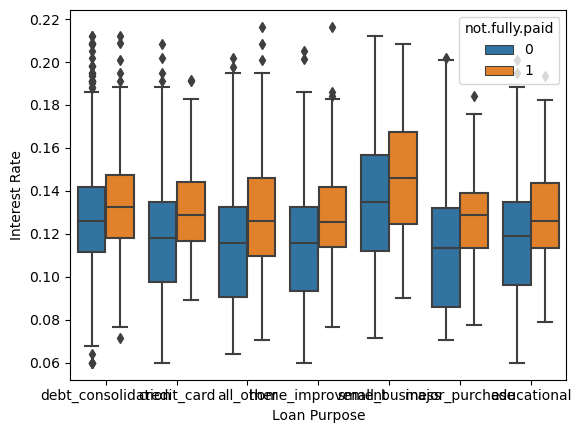

Pour regarder le taux d'interet en fonction du purpose


In [13]:
# Level ++
# Is there any other pertinent visualization do plot? explain and describe it

sns.boxplot(x='purpose', y='int.rate', data=df, hue='not.fully.paid')
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate')
plt.show()

print("Pour regarder le taux d'interet en fonction du purpose")

## Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

In [14]:
# Level 1 
# Check the information of the dataset with info() again.

print("List of information :")
df.info()

List of information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

In [15]:
# Level 1 
# Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.

cat_feats = ['purpose']
cat_feats

['purpose']

In [16]:
# Level 1 
# Now use get_dummies() to create a fixed larger dataframe that has new feature columns with dummy variables.
# Set this dataframe as final_data.
# (hint 9)

final_data = pd.get_dummies(df, columns=cat_feats, drop_first=True)
print("Data final :")
final_data

Data final :


credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9573       10474.000000     215372        82.1               2            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   
9577        4740.000000      37879        57.0               6            0   

      pub.rec  not.fully.paid  purpose_credit_card  \
0           0               0                    0   
1           0               0                    1   
2           0               0                    0   
3           0               0                    0   
4           0               0                    1   
...       ...             ...                  ...   
9573        0               1                    0   
9574        0               1                    0   
9575        0               1                    0   
9576        0               1                    0   
9577        0               1                    0   

      purpose_debt_consolidation  purpose_educational  \
0                              1                    0   
1                              0                    0   
2                              1                    0   
3                              1                    0   
4                              0                    0   
...                          ...                  ...   
9573                           0                    0   
9574                           0                    0   
9575                           1                    0   
9576                           0                    0   
9577                           1                    0   

      purpose_home_improvement  purpose_major_purchase  purpose_small_business  
0                            0                       0                       0  
1                            0                       0                       0  
2                            0                       0                       0  
3                            0                       0                       0  
4                            0                       0                       0  
...                        ...                     ...                     ...  
9573                         0                       0                       0  
9574                         0                       0                       0  
9575                         0                       0                       0  
9576        

## Train Test Split

Now its time to split our data into a training set and a testing set!

In [17]:
# Level 1 
# Separate your data into a training and a test set
# with 80% for the training set.

from sklearn.model_selection import train_test_split

X = final_data.drop('not.fully.paid', axis=1)  
y = final_data['not.fully.paid'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_test : ")
print(X_test)
print("y_test : ")
print(y_test)

print("Taille du test - X:", X_test.shape, " y:", y_test.shape)

X_test : 
      credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
8558              0    0.1545       453.52       10.596635  14.52   657   
4629              1    0.1183       533.46       11.156251  10.89   732   
1383              1    0.1146       197.75       10.348173  13.73   692   
8142              0    0.1646       106.16       11.002100  28.16   672   
1768              1    0.1221       159.92       11.127322   3.99   702   
...             ...       ...          ...             ...    ...   ...   
1017              1    0.1197       153.55       10.596635  23.85   732   
6755              1    0.1183       215.38       10.379722  22.25   722   
3114              1    0.1253       167.34       11.042858   8.95   687   
7902              0    0.1028       259.20        9.830917   6.97   697   
1599              1    0.0768        93.57       11.225243  11.90   752   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
8558      

## Training a Decision Tree Model

Let's start by training a single decision tree first!

In [18]:
# Level 1 
# Is this a classification or a regression problem ?
# Import the appropriate version of DecisionTree, then
# train it with your training data.

print("C'est un problème de classification !")

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

C'est un problème de classification !


DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree


In [19]:
# Level 1 
# What is the accuracy of your model (both on training
# and test sets) ? Do you think we are underfitting ? Overfitting ?

from sklearn.metrics import accuracy_score

y_train_pred = tree.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {training_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("I think, there is a overfitting because the train accuracy is better than the test one")

Train Accuracy: 1.00
Test Accuracy: 0.74
I think, there is a overfitting because the train accuracy is better than the test one


Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       1.00      0.00      0.01       305

    accuracy                           0.84      1916
   macro avg       0.92      0.50      0.46      1916
weighted avg       0.87      0.84      0.77      1916



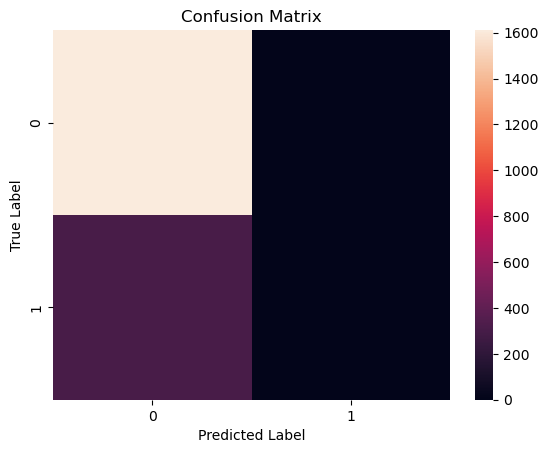

In [20]:
# Level 1 
# Create predictions from the test set and create a classification report and a confusion matrix

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [21]:
# Level 2
# Look at the documentation of your DecisionTree model
# and try to tune the hyperparameters: create other models
# with different values for max_depth, min_samples_split, max_features...
# Train them and evaluate their accuracy. What is the best accuracy
# you obtain?

from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_dt_model = DecisionTreeClassifier(random_state=42, **best_params)
best_dt_model.fit(X_train, y_train)

y_pred_dt = best_dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy with Best Hyperparameters:", accuracy_dt)

print("The accuracy is better because of the Best Hyperparameters")


Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_split': 10}
Accuracy with Best Hyperparameters: 0.8194154488517745
The accuracy is better because of the Best Hyperparameters


In [22]:
# Level 3 
# Use the feature_importances_ attribute of your best model. What are
# the three most important features to evaluate the whether or not the borrower paid back their loan in full?

feature_importances = best_dt_model.feature_importances_

feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_df = feature_df.sort_values(by='Importance', ascending=False)

top_3_features = feature_df.head(3)
print("The three most important features:")
print(top_3_features)


The three most important features:
          Feature  Importance
1        int.rate    0.150201
3  log.annual.inc    0.135361
2     installment    0.122951


## Training the Random Forest model

Now its time to train our model!


In [23]:
# Level 1 
# Import the appropriate version of RandomForest, then
# train it with your training data.

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.


In [24]:
# Level 1 
# Predict the class of not.fully.paid for the X_test data

y_test_pred = rf_model.predict(X_test)

y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
# Level 1 
# What is the accuracy of your model (both on training
# and test sets) ? Do you think we are underfitting ? Overfitting ?

from sklearn.metrics import accuracy_score

y_train_pred = rf_model.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)

print("Il y a une meilleure précision pour la train data ducoup il est underfitting ")

Accuracy on Training Set: 1.0
Accuracy on Test Set: 0.8413361169102297
Il y a une meilleure précision pour la train data ducoup il est underfitting 


In [26]:
# Level 1 
# Create predictions from the test set and create a classification report. 
# Do you get anything strange or some sort of warning?

class_report = classification_report(y_test, y_test_pred)

print("Classification Report:\n", class_report)

print("Rien ne me parait bizarre sur ces données")

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.53      0.03      0.05       305

    accuracy                           0.84      1916
   macro avg       0.69      0.51      0.48      1916
weighted avg       0.79      0.84      0.78      1916

Rien ne me parait bizarre sur ces données


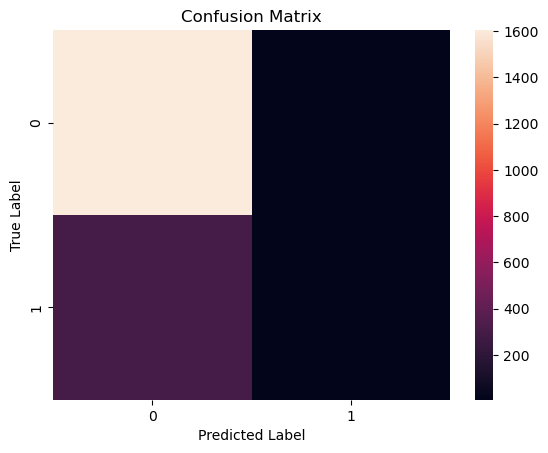

In [27]:
# Level 1 
# Show the Confusion Matrix for the predictions.
# What performed better the random forest or the decision tree?

conf_matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Level 2
# Train other random forest model with different
# hyperparameters (n_estimators, max_features). Can you beat
# the best accuracy you obtained with a single decision tree ?

new_rf_model = RandomForestClassifier(n_estimators=200, max_features='sqrt', random_state=42)

new_rf_model.fit(X_train, y_train)

y_pred_new_rf = new_rf_model.predict(X_test)
accuracy_new_rf = accuracy_score(y_test, y_pred_new_rf)

print("Accuracy of the New Random Forest Model:", accuracy_new_rf)


Accuracy of the New Random Forest Model: 0.8418580375782881


## Bonus 

In [29]:
# Level 3
# Use other classification models to try to improve your prediction 

from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)


In [30]:
# Level ++
# Visualize DecisionTree (graphviz, be careful with the dependencies)

import graphviz

dot_data = export_graphviz(best_dt_model)

graph = graphviz.Source(dot_data)
graph.render("decision_tree_visualization")  
graph.view("decision_tree_visualization")  


ModuleNotFoundError: No module named 'graphviz'

In [ ]:
# Level ++
# Is there any other evaluation analysis you can implement on your predictions? 

# Great Job!